# HW3 Pitfalls

suggested order for tests:
- test_mean_squared_error
- test_generate_regression_data
- test_polynomial_regression
- test_perceptron
- test_transform_data

as always, be sure to check out documentation for useful numpy commands:<br>
https://numpy.org/doc/stable/<br>
https://matplotlib.org/api/_as_gen/matplotlib.pyplot.html#module-matplotlib.pyplot

## matplotlib Tips

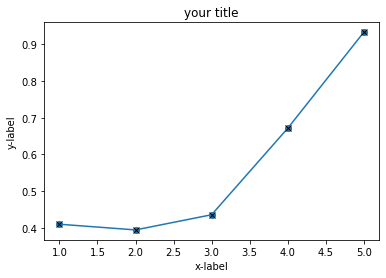

In [6]:
import matplotlib.pyplot as plt
import numpy as np

# For this homework, you will need to get comfortable with matplotlib for specific functions, as well as answering
# free response questions
x = np.linspace(1, 5, 5)
y = np.random.rand(5)

# To create a figure:
fig = plt.figure()

# Title and axis
plt.title('your title')
plt.xlabel('x-label')
plt.ylabel('y-label')

# To plot you can use a variety of functions, such as .plot, .scatter, etc.
plt.plot(x, y)
plt.scatter(x, y)

# You can also add a third argument to change the shape/symbol of the points such as
plt.plot(x, y, 'kx') # this will plot 'x' marks instead of dots

# To save a figure:
fig.savefig('name-of-fig')

## Generating Regression Data

In [15]:
x = np.linspace(-5, 5, 20)

# numpy has a polynomial class that you might find useful, just input the coefficients you want
# class documentation can be found here: https://numpy.org/doc/stable/reference/generated/numpy.poly1d.html
coefficients = [1, 2, 3, 4]
p = np.poly1d(coefficients)

# keep note of the order of the coefficients
print(p)

   3     2
1 x + 2 x + 3 x + 4


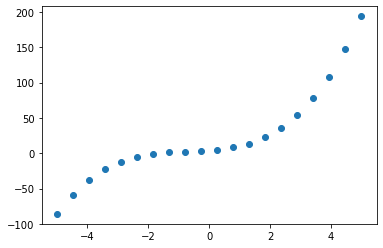

In [16]:
# simply apply the polynomial to the data points to get the data you want
y = [p(x_i) for x_i in x]
    
plt.scatter(x, y)

## Polynomial Regression Tips
In order to run a polynomial regression, you must calculate weights using linear algebra matrix multiplication.
Essentialy, the algorithm is as follows: (https://en.wikipedia.org/wiki/Polynomial_regression)
- Create an empty array of size inputs and degree + 1 (you need a _const column)
- Iteratre through features
    - Matrix a row n will be an array consisting of the input multiplied by the degree looped from 0 to degree (inclusive). The first column will just be a column of 1s
- Once your matrix is created, use np.matmul and np.inalg.inv to calculate the coefficients
- Store these coefficients as a global variable to be used in the predict funciton

In [1]:
import numpy as np
# Given a specific test feature, the prediction is :
coefficients = np.random.rand(4) # coefficients of a regression of degree 3
feature = 2
y_hat = [coefficients[i] * (feature ** i) for i in range(len(coefficients))] # where ** means to the power of
print(y_hat)

[0.7390949564246507, 1.425840333392289, 2.9512563800713227, 7.278754472559692]


## Perceptron Tips
Be sure to check out the Linear Discriminants slides on the course website. The pseudocode for the perceptron algorithm can be found on slide 34. Link below.
https://nucs349.github.io/lectures/eecs349_linear_discriminants.pdf<br>
Essentialy, the algorithm is as follows
- initialize random weights vector $w$
- iterate through the training data
    - if the predicted label for a data point is incorrect
        - adjust the weights vector using $w = w + xy$<br>($x$ is the data point vector and $y$ is the label of that data point)
- stop when all labels are predicted correctly or maximum number of iterations is reached

In [24]:
# w^T*x is simply the dot product of two vectors w and x, 
# where x is the features vector with an appended 1 for a bias
x = np.concatenate((np.ones(1), np.random.rand(4)))
w = np.random.rand(5)
np.dot(w, x)

1.2332002432746247

In [25]:
# remember that because of the bias in your weights vector, 
# you want to remove this for predictions calculations
predict_this = np.random.rand(4)
np.dot(w[1:], predict_this)

1.120946614576219